In [2]:
import pandas as pd 
import numpy as np 
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [4]:
dataframe = pd.read_csv('emails.csv')

# A quick look to our data set to gain insight 

In [5]:
dataframe.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
dataframe.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


From first look we deduce that the data set is not shuffled. There are a lot of 1 in the first columns and then we have a lot of zeros. We have to shuffle it 

In [7]:
df = dataframe.sample(frac=1).reset_index(drop=True)

In [8]:
print(df)

                                                   text  spam
0     Subject: re : ken lay ' s speech  the $ 460 bi...     0
1     Subject: hi  how to save on your medlc doggone...     1
2     Subject: re : dale nesbitt meeting tues  marga...     0
3     Subject: re : hello  hello ,  i just received ...     0
4     Subject: request submitted : access request fo...     0
...                                                 ...   ...
5723  Subject: monday ' s newsletter  hello vince ! ...     0
5724  Subject: eprm 2001 houston  dear speaker ,  i ...     0
5725  Subject: re : parking pass for van ngo  done ....     0
5726  Subject: free ltc " sales closers "  which vir...     1
5727  Subject: customer profiling meeting  bob shult...     0

[5728 rows x 2 columns]


Okay now let's remove duplicates

In [16]:
df.drop_duplicates(inplace=True)
print(df)

                                                   text  spam
0     Subject: re : ken lay ' s speech  the $ 460 bi...     0
1     Subject: hi  how to save on your medlc doggone...     1
2     Subject: re : dale nesbitt meeting tues  marga...     0
3     Subject: re : hello  hello ,  i just received ...     0
4     Subject: request submitted : access request fo...     0
...                                                 ...   ...
5723  Subject: monday ' s newsletter  hello vince ! ...     0
5724  Subject: eprm 2001 houston  dear speaker ,  i ...     0
5725  Subject: re : parking pass for van ngo  done ....     0
5726  Subject: free ltc " sales closers "  which vir...     1
5727  Subject: customer profiling meeting  bob shult...     0

[5695 rows x 2 columns]


Let's take a look to some emails 

In [18]:
print(df['text'][10])

Subject: off work  all  i will be taking the following days off work :  thursday 9 th march ( all day )  friday 10 th march ( all day )  monday 13 th march ( all day )  tuesday 14 th march ( all day )  wednesay 15 th march ( morning only )  steve


We have to remove stop words and tokenize every email. And then turn every remaining word to a number. It's vectorization.

In [19]:
def text_processing(text):
    
    #remove punctuation
    words = [word for word in text if word not in string.punctuation]
    words = ''.join(words)
    
    #remove stop words 
    clean_words = [word for word in words.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words

# Vectorization

In [21]:
vectorizer = CountVectorizer(analyzer=text_processing)
transformed_emails = vectorizer.fit_transform(df['text'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(transformed_emails, df['spam'], test_size=0.2, random_state=42)

In [23]:
models = {'Log':LogisticRegression(), 'Multi':MultinomialNB(),'Forest':RandomForestClassifier(n_estimators=30, criterion='gini', max_features = 10000, random_state =0)}

trained_models = list() 

for model in models.values():
    model.fit(X_train, y_train)
    acc = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
    print(acc.mean())
    trained_models.append(model)

0.9883661075766339
0.9910005783689995
0.974973973395026


No let's see the best model on test data

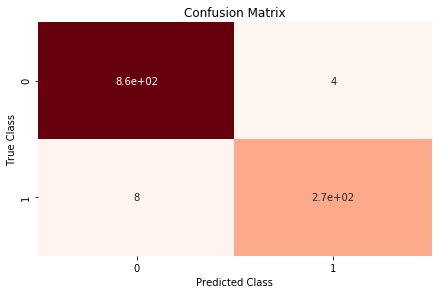

The accuracy: 0.9894644424934153


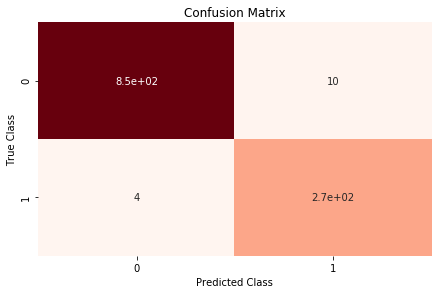

The accuracy: 0.9877085162423178


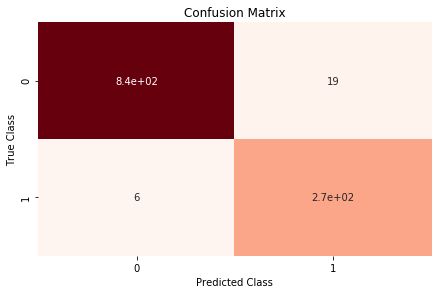

The accuracy: 0.9780509218612818


In [24]:
for i in range(len(trained_models)):
    
    predictions = trained_models[i].predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)

    resultsframe = pd.DataFrame(conf_matrix)
    sns.heatmap(resultsframe, annot=True, cbar=None, cmap="Reds")
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()
    print('==============================')
    print('The accuracy: ', end='')
    print((resultsframe[0][0] + resultsframe[1][1]) / (resultsframe[0][1] + resultsframe[1][0]+ resultsframe[0][0] + resultsframe[1][1]))
    
    

So the logistic regression is doing well in data it has never seen. So i will choose him as the best model

# Dealing with our own mails

Now we gonna write code which allows us to determine whether given an input mail is a spam or not

In [26]:
new_email = [input('Write your email here : ')]

vect_email = vectorizer.transform(new_email)

prediction = trained_models[0].predict(vect_email)

if prediction == 1:
    print('Your email is a spam')
else:
    print('Your email is not a spam')
    

Write your email here : kkkk
Your email is not a spam
